### Menghubungkan Collab dengan Google Drive

In [ ]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Pemanggilan Dataset di drive

In [ ]:
# memanggil dataset lewat gdrive
path = "/content/gdrive/My Drive/semester7/MachineLearning/praktikum_ml/praktikum10/"

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE

### Mengimport pandas untuk memanggil

In [ ]:
df = pd.read_csv(path + 'data/weather_classification_data.csv')
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [ ]:
print(df['Cloud Cover'].unique())
print(df['Season'].unique())
print(df['Location'].unique())
print(df['Weather Type'].unique())

['partly cloudy' 'clear' 'overcast' 'cloudy']
['Winter' 'Spring' 'Summer' 'Autumn']
['inland' 'mountain' 'coastal']
['Rainy' 'Cloudy' 'Sunny' 'Snowy']


In [ ]:
replacements = {
    'Cloud Cover': {
        'clear': 0,
        'partly cloudy': 1,
        'cloudy': 2,
        'overcast': 3
    },
    'Season': {
        'Winter': 0,
        'Spring': 1,
        'Summer': 2,
        'Autumn': 3
    },
    'Location': {
        'inland': 0,
        'coastal': 1,
        'mountain': 2
    },
    'Weather Type': {
        'Sunny': 0,
        'Cloudy': 1,
        'Rainy': 2,
        'Snowy': 3
    }
}

df_clean = df.replace(replacements)
df_clean.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,1,1010.82,2,0,3.5,0,2
1,39.0,96,8.5,71.0,1,1011.43,7,1,10.0,0,1
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,0
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,1,0
4,27.0,74,17.0,66.0,3,990.67,1,0,2.5,2,2


In [ ]:
df_clean.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [ ]:
# data yang dilatih
X = df_clean.drop(columns=['Weather Type'])
y = df_clean['Weather Type']

In [ ]:
# data validasinya
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Ukuran Data Train :", X_train.shape, y_train.shape)
print("Ukuran Data Test  :", X_test.shape, y_test.shape)

Ukuran Data Train : (10560, 10) (10560,)
Ukuran Data Test  : (2640, 10) (2640,)


In [ ]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
3958,32.0,66,6.0,92.0,1,1010.21,2,1,1.5,0,2
2239,15.0,96,11.0,57.0,3,1016.98,0,3,4.0,2,2
3608,28.0,58,6.5,11.0,0,1025.37,10,2,9.0,0,0
6848,47.0,84,44.5,85.0,3,992.26,2,0,2.0,1,2
6119,18.0,66,14.0,10.0,1,1000.04,1,3,8.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
11964,32.0,98,5.5,89.0,3,1006.51,2,1,2.5,1,2
5191,41.0,79,14.0,17.0,3,959.01,14,2,1.0,2,2
5390,34.0,52,7.0,13.0,3,1009.30,1,2,8.0,1,1
860,9.0,73,10.0,84.0,3,1000.06,14,1,8.0,2,1


In [ ]:
df_test = pd.concat([X_test, y_test], axis=1)
df_test

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
4111,23.0,38,4.5,6.0,0,1021.19,9,3,10.0,0,0
10607,62.0,94,14.5,83.0,0,1025.57,10,2,4.0,0,0
7372,40.0,51,2.0,12.0,1,1025.15,8,1,8.0,2,0
11786,-7.0,79,6.5,90.0,3,993.56,0,0,1.5,0,3
12227,21.0,94,10.0,109.0,1,1027.71,11,1,9.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
2543,33.0,63,6.0,59.0,1,1017.11,0,2,5.0,1,2
96,23.0,88,11.5,65.0,3,1000.74,1,0,5.0,2,2
2474,-4.0,94,4.0,93.0,3,999.99,0,0,2.0,2,3
2522,-3.0,98,8.0,89.0,1,996.59,1,0,1.5,2,3


In [ ]:
print("df_train shape:", df_train.shape)
print("df_test shape :", df_test.shape)

df_train shape: (10560, 11)
df_test shape : (2640, 11)


In [ ]:
df_train.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [ ]:
df_test.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


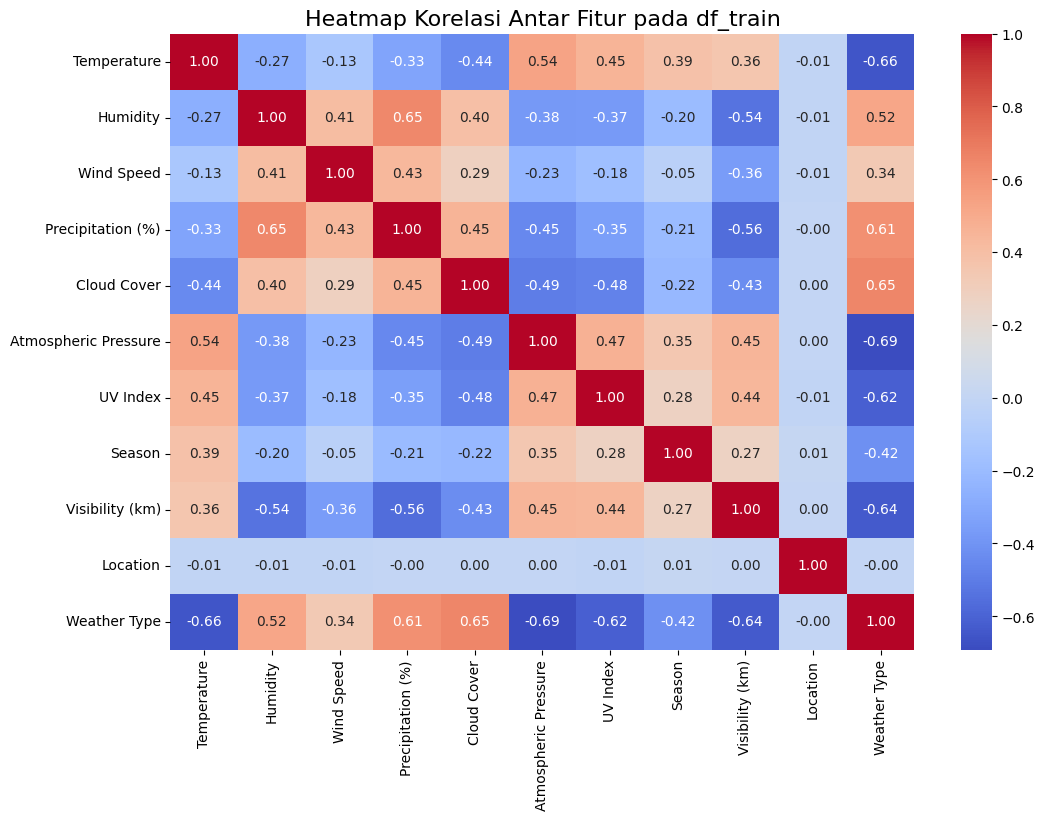

In [ ]:
# Menghitung matriks korelasi menggunakan Spearman
correlation_matrix = df_train.corr(method='spearman')

# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Heatmap Korelasi Antar Fitur pada df_train", fontsize=16)
plt.show()

/tmp/ipython-input-507879608.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weather Type', data=df_train, palette='Set2')


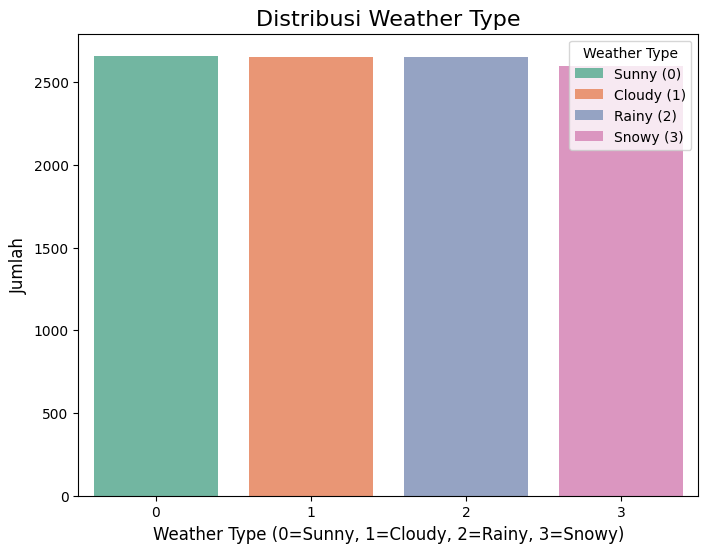

In [ ]:
# Membuat diagram batang untuk Weather Type
plt.figure(figsize=(8, 6))
sns.countplot(x='Weather Type', data=df_train, palette='Set2')

# Menambahkan judul dan label
plt.title('Distribusi Weather Type', fontsize=16)
plt.xlabel('Weather Type (0=Sunny, 1=Cloudy, 2=Rainy, 3=Snowy)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menambahkan legend (adjusted labels for correctness)
plt.legend(
    title='Weather Type',
    labels=['Sunny (0)', 'Cloudy (1)', 'Rainy (2)', 'Snowy (3)'],
    loc='upper right'
)

# Menampilkan plot
plt.show()

In [ ]:
# Normalisasi features after splitting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print("Before SMOTE:")
print(y_train.value_counts())

sm = SMOTE(random_state=42, k_neighbors=1)  # Set k_neighbors to 1
x_train_smote, y_train_smote = sm.fit_resample(X_train_scaled, y_train)

print("After SMOTE:")
print(y_train_smote.value_counts())

Before SMOTE:
Weather Type
0    2659
2    2653
1    2649
3    2599
Name: count, dtype: int64
After SMOTE:
Weather Type
2    2659
0    2659
1    2659
3    2659
Name: count, dtype: int64


In [ ]:
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(x_train_smote, y_train_smote)

print("Best Params:", grid.best_params_)
print("Best Score (CV):", grid.best_score_)

Best Params: {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
Best Score (CV): 0.8991160464631254


In [ ]:
best_knn = grid.best_estimator_
best_knn.fit(x_train_smote, y_train_smote)

# Prediksi
y_pred = best_knn.predict(X_test_scaled)

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       641
           1       0.88      0.86      0.87       651
           2       0.86      0.88      0.87       647
           3       0.93      0.94      0.94       701

    accuracy                           0.90      2640
   macro avg       0.89      0.89      0.89      2640
weighted avg       0.90      0.90      0.90      2640



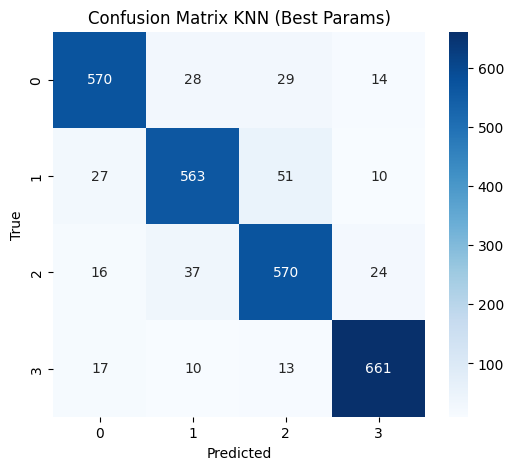

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

plt.title("Confusion Matrix KNN (Best Params)")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

In [ ]:
cv_scores = cross_val_score(best_knn, x_train_smote, y_train_smote, cv=5)

print("Cross Validation Accuracy:", cv_scores.mean())
print("Std Dev:", cv_scores.std())

Cross Validation Accuracy: 0.8991160464631254
Std Dev: 0.00563360081954565


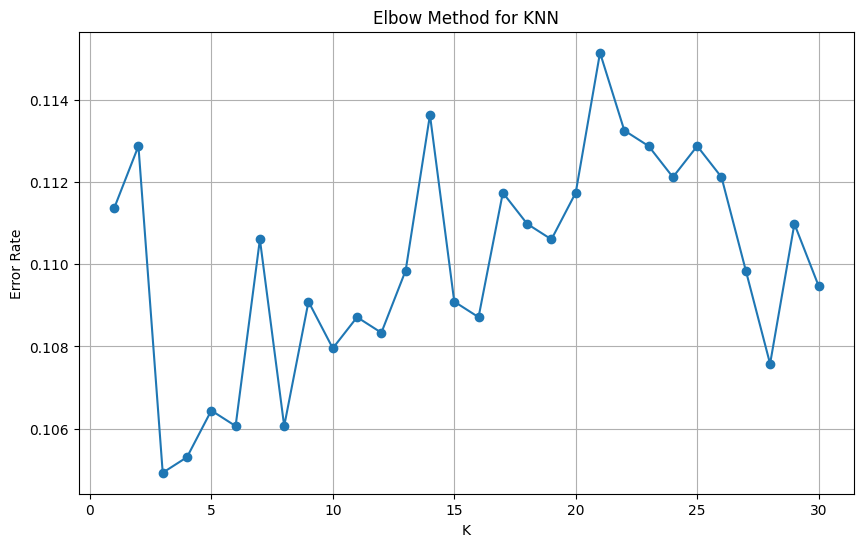

In [ ]:
errors = []

for k in range(1, 31):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(x_train_smote, y_train_smote)
    pred = knn_temp.predict(X_test_scaled)
    errors.append(np.mean(pred != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1, 31), errors, marker='o')
plt.title("Elbow Method for KNN")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.grid(True)
plt.show()